# Métodos de clasificación y evaluación de desempeño.

Cualquier modelo de aprendizaje supervisado requiere una previa verificación antes de ser utilizado en el mundo real. 

La precisión de un modelo se mide con base en la función de costo.

$$  L(Y, f(x))  $$ 

$L$ recibe el valor real $Y$ (dato considerado como verdadero) y el valor que el modelo $f$ predice con el dato de entrada $x$.

Por tanto, el error de $L$ depende únicamente del dato de entrada $x$ en un modelo entrenado determinado. El objetivo es minimizar el error de $L$, sabiendo que ésta representa la diferencia entre el valor teórico y el predicho.

$$ Err = E[ L(Y, f(x)) ]  $$

$Err$ representa el error promedio para todos los datos $x$ y $E[]$ la esperanza calculada sobre estos valores obtenidos.

Las funciones de costo/pérdida pueden ser diferentes, entre ellas el conocido error cuadrático medio (ECM).

<center><img src= "res/ecm.png"></center>

# División de los datos.

En la mayoría de los casos, para todos los modelos de aprendizaje de máquina se dividen los datos en dos conjuntos, uno que sirve para entrenar el modelo y el otro para verificar los resultados del modelo ya entrenado, estos son denominados set de entrenamiento y set de pruebas (train and test sets).

Los datos, usualmente vienen con el siguiente formato:

$[X, Y]$ donde $X$ son las variables independientes (los datos de entrada), y $Y$ es la variable dependiente (lo que se quiere predecir).

Una consideración muy importante al dividir los datos en varios conjuntos es mantener las proporciones del dataset original.

Usualmente, la proporción que se deja entre el conjunto de entrenamiento y prueba es 80-20. El 80% de los datos para el conjunto de entrenamiento y el 20% restante para el de pruebas, este tipo de división suele hacerse cuando se cuentan con pocos datos (un par de decenas de miles).

Debe tenerse en cuenta que si se trabaja con Big Data, el volumen de datos es mucho mayor y no hay problema al realizar proporciones del tipo 98% - 2%, dado que se tienen varios millones.

# Ejercicio practico.

A continuación, se leerá un dataset de diabetes que se encuentra en la carpeta "datos", tal como puede apreciarse, éste es un archivo de tipo "csv", como el que usted creó en el ejercicio guiado.

In [67]:
# Paquetes necesarios para la manipulación de los datos
import pandas as pd
from sklearn.metrics import auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.metrics import precision_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

Una vez leídos los paquetes necesarios para manipular los datos, entre ellos se encuentra pandas y sklearn, debe leerse el dataset de diabetes.

In [68]:
diabetes = pd.read_csv("datos/diabetes.csv", sep=",")

Probemos que haya sido leído, imprimamos la información, para no utilizar espacio del notebook innecesariamente, solo será impresa la cola del dataset(si se quiere leer la parte superior, se utiliza "head").

In [69]:
#diabetes.head()
diabetes.tail()

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive
767,1,93,70,31,0,30.4,0.315,23,tested_negative


### Es importante conocer los datos con los que se está trabajando.

Por tanto, es sugerible imprimir las columnas de nuestro dataset y adicionalmente, conocer las dimensiones del mismo.

In [70]:
#Nombres de las características de éste dataset
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [71]:
#(Número de datos, Número de características) ó (filas,columnas)
diabetes.shape

(768, 9)

Una de las columnas es la clase "class", es muy importante conocerla dado que corresponde a los datos Y del dataset (lo que busca predecirse a partir del conjunto de datos X y el modelo escogido).

In [72]:
#Mostrar las clases del dataset
set(diabetes["class"])

{'tested_negative', 'tested_positive'}

En este caso específico, este dataset requiere clasificación de tipo binario.

## Normalización o escalamiento.

Una vez conocidos los datos, hay que realizar un proceso de escalamiento. Consiste en llevar todos los datos numéricos en el rango [0,1].

Aunque existen múltiples scaler (MinMax, standard, etc) en este caso específico, escogeremos MinMax.

In [73]:
#Seleccionar el scaler
scaler = MinMaxScaler()

## ¡La clase NO debe normalizarse!

Por lo tanto, antes de normalizar los datos utilizando el scaler, separaremos los datos de entrada "X" y los datos reales "Y" o clase.

In [74]:
X_diabetes = diabetes.drop("class", axis=1)
Y_diabetes = diabetes["class"]

Para estar seguros, imprimamos X_diabetes y Y_diabetes.

In [75]:
X_diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [76]:
Y_diabetes.head()

0    tested_positive
1    tested_negative
2    tested_positive
3    tested_negative
4    tested_positive
Name: class, dtype: object

## Ahora, se escalan los datos X_diabetes.

In [77]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

Una vez escalados, son convertidos en un array, volvamos esta información un dataframe de pandas y procedamos a trabajar con él.

In [78]:
X_diabetes_scaled = pd.DataFrame(X_diabetes_scaled, columns = X_diabetes.columns)

Una vez más, imprimamos los datos para verificar que estén en el rango [0,1].

In [79]:
X_diabetes_scaled.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# División en conjuntos de entrenamiento y pruebas.

La primera consideración que debe hacerse es, ¿Con cuántos datos cuento?, efectivamente tenemos 768 datos y 9 características distintas, por lo tanto, lo mejor es optar por una división tipo 80-20.

Utilizando el dataframe obtenido tras normalizar (recordemos que podemos utilizar los mismos datos para Y dado que la clase no recibió ningún tipo de tratamiento), redefinimos X_diabetes & Y_diabetes.

In [80]:
#Antes de realizar una división 80-20, definir los conjuntos X & Y.

X_diabetes = X_diabetes_scaled
Y_diabetes = diabetes["class"]

Verificar que tengan el mismo numero de filas es importante.

También es sugerible imprimir X_diabetes & Y_diabetes en caso de no saber si están correctos los conjuntos de trabajo.

In [81]:
if X_diabetes.shape[0] == Y_diabetes.shape[0]:
    print("El número de filas coinciden, ¡Es correcto!")


El número de filas coinciden, ¡Es correcto!


Finalmente, debe realizarse la división de los datos, utilizando la función "split".

In [82]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, Y_diabetes, test_size=0.20)

Nótese que el "test_size" es 0.20, lo que coincide con la teoría.

Por otro lado, esta función le da valores de prueba y entrenamiento distintos cada vez que el código es utilizado, por lo tanto, no debe sorprenderse si hay variaciones en los conjuntos, lo que se mantendrá constante es la proporción entre éstos.

# Modelos de clasificación.

Tal como se sugiere, el primer modelo de clasificación que se utilizará será la Regresión Logística.

Posteriormente se observará la matriz de confusión asociada y las métricas derivadas de ésta.

In [83]:
#Regresión Logística con sklearn
regresion_logistica = linear_model.LogisticRegression()

Ahora, ajustemos los datos al modelo. Nótese que se utilizan los conjuntos X e Y de entrenamiento.

In [84]:
regresion_logistica.fit(X_train_diabetes, y_train_diabetes)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez ajustado el modelo, observemos los resultados obtenidos.

Esta primer pincelada puede darse reportando el <i><b> error de entrenamiento </b></i> y el <i><b> error de pruebas. </b></i>

Para ello, realizaremos predicciones sobre el conjunto de pruebas(X_test_diabetes) y entrenamiento (X_train_diabetes) y calcularemos su "accuracy_score" respecto de los conjuntos de entrenamiento y prueba del conjunto Y (datos reales).

In [85]:
y_pred_train = regresion_logistica.predict(X_train_diabetes)
efectividad_entrenamiento = accuracy_score(y_train_diabetes, y_pred_train)
print("Precisión de entrenamiento = " + str(efectividad_entrenamiento))

Precisión de entrenamiento = 0.7719869706840391


In [86]:
y_pred_test = regresion_logistica.predict(X_test_diabetes)
efectividad_pruebas = accuracy_score(y_test_diabetes, y_pred_test)
print("Precisión de pruebas: " + str(efectividad_pruebas))

Precisión de pruebas: 0.7597402597402597


¿El modelo es un buen clasificador? ¿Esta sobre ajustado, bien o subajustado?

# Matriz de confusión

Ahora, se realizará la implementación de la matriz de confusión del modelo de Regresión Logística que se planteó con anterioridad.

Nótese que ésta visualización permite encontrar métricas estadísticas y matemáticas para medir el desempeño del modelo, al mismo tiempo que deja ver si el éste está confundiendo una clase con otra.

No necesariamente es de carácter binario, por lo cual es flexible a distintos tipos de clasificación.

Es una comparación entre valores reales y valores predichos.

<center> <img src = "res/matriz.png"> </center>

A continuación, se utiliza "confusion_matrix" de sklearn.metrics para reportar esta información.

In [87]:
matriz_confusion = confusion_matrix(y_test_diabetes, y_pred_test, labels=["tested_negative", "tested_positive"])

# Para mostrar de mejor forma la matriz
table = pd.DataFrame(matriz_confusion)
table.columns = ["tested_negative", "tested_positive"]
table.index = ["tested_negative", "tested_positive"]
print(table)

                 tested_negative  tested_positive
tested_negative               88               14
tested_positive               23               29


Como puede observarse, este modelo presenta un problema con el dataset, dado que en 31 casos donde el paciente si sufre la enfermedad, los clasifica como negativos.

A continuación se pueden describir las métricas vistas en clase, especialmente útiles cuando los datos estan desbalanceados. 

Los Falsos Positivos(FP), Falsos Negativos (FN), Verdaderos Positivos (VP) y Verdaderos Negativos (VN), que adquieren sentido cuando se trata de un problema de clasificación binaria.

In [88]:
VN, FP, FN, VP = matriz_confusion.ravel()

Pueden imprimirse los valores correspondientes a VN, FP, FN y VP para corroborar que la información sea correcta en éstos. O bien, entender a qué corresponden.

# Métricas

### Precisión del modelo:

$$P = \frac{VerdaderoPositivo}{VerdaderoPositivo + FalsoPositivo}$$

Probabilidad de que el modelo no marque como positivo, una muestra negativo.

In [89]:
P = VP/(VP+FP)
print("La precisión del modelo es: " + str(P))

La precisión del modelo es: 0.6744186046511628


### Sensibilidad(Recall) del modelo:

$$R = \frac{VerdaderoPositivo}{VerdaderoPositivo + FalsoNegativo}$$

Capacidad del modelo de encontrar los valores positivos.

In [90]:
R = VP/(VP+FN)
print("La sensibilidad del modelo es: " + str(R))

La sensibilidad del modelo es: 0.5576923076923077


### Especificidad del modelo:

$$E = \frac{VerdaderoNegativo}{VerdaderoNegativo + FalsoPositivo}$$

Capacidad del modelo de encontrar elementos negativos.

In [91]:
E = VN/(VN+FP)
print("La especificidad del modelo es: " + str(E))

La especificidad del modelo es: 0.8627450980392157


### F1 Score:



$$F1\_score = \frac{2 * P * R}{P + R}$$

Promedio entre precisión y sensibilidad, que da igual importancia a ambos valores.


In [92]:
F = (2*P*R)/(P+R)
print("El F1-Score del modelo es: " + str(F))

El F1-Score del modelo es: 0.6105263157894736


## El caso multi-clase.

Si se encuentra un problema multi-clase, pueden utilizarse estas versiones del código.

precision_score, recall_score, fbeta_score de la librería sklearn.metrics.

### AUC (Area Under Curve)

Para modelos de clasificación binaria únicamente, como la Regresión Logística, puede definirse un threshold, tal que diferencie valores verdaderos o falsos.

El umbral es muy importante, si es muy cercano a cero (como 0.1) el sistema tiende a clasificar todo como positivo, si es cercano a 1 (como 0.9) los objetos clasificados serán casi todos negativos y finalmente, si el umbral es 0.5 tenderá a clasificar todo por igual.

Así mismo, para la métrica AUC se busca obtener valores asociados a la Sensibilidad $S$ y la Especificidad $E$, posteriormente construir el gráfico $S$ vs $1-P$.

A continuación, se implementa el AUC para el modelo Regresión Logística aplicado al dataset de diabetes normalizado.

In [93]:
# Calculo del valor x para el caso de la regresión logistica
y_score = regresion_logistica.decision_function(X_test_diabetes)

In [94]:
fpr, tpr, thresholds = roc_curve(y_test_diabetes, y_score, pos_label="tested_positive")
print("Los thresholds son: \n")
print(thresholds)
print("Los valores de sensibilidad son: \n")
print(tpr) # imprimir la sensibilidad
print("Los valores de especificidad son: \n")
print(1-fpr) # imprimir la especificidad

Los thresholds son: 

[ 3.03056962  2.03056962  1.04952705  0.9892534   0.96701031  0.93342154
  0.83268782  0.80765295  0.78803103  0.77810861  0.74810516  0.61048451
  0.28377605  0.20872431  0.2080793   0.19226775  0.15286856  0.15183809
  0.1271095   0.06982802  0.03373333  0.02349163 -0.0291193  -0.19458699
 -0.20727986 -0.31752046 -0.3339387  -0.33747119 -0.39067488 -0.48636757
 -0.54967911 -0.61948724 -0.6263719  -0.65990193 -0.72918791 -0.74959934
 -0.7533297  -0.75522885 -0.80258262 -0.87301399 -0.88453856 -0.93118526
 -0.93605157 -0.9392842  -0.97521669 -1.09446418 -1.09489543 -1.16224463
 -1.23509951 -1.32667316 -1.32824509 -1.39478126 -1.41204999 -3.74128844]
Los valores de sensibilidad son: 

[0.         0.01923077 0.13461538 0.13461538 0.15384615 0.15384615
 0.19230769 0.19230769 0.21153846 0.21153846 0.23076923 0.23076923
 0.40384615 0.40384615 0.42307692 0.42307692 0.46153846 0.46153846
 0.5        0.5        0.55769231 0.55769231 0.57692308 0.57692308
 0.61538462 0.615

En el código anterior, se calculas varios valores de umbral (thresholds), cada uno acompañado de la sensibilidad (tpr) y el valor de 1-especificidad (fpr) que arrojaría la matriz de confusión de ese umbral.

### Finalmente, se muestra la curva ROC y la comparación con la peor configuración posible existente, con matplotlib.

Text(0.5, 1.0, 'AUC')

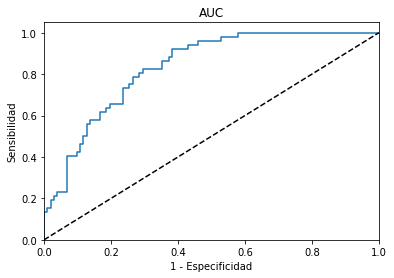

In [95]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('AUC')

Ahora, el objetivo es calcular el AUC de la curva ROC, área que representa una medida de qué tan bueno o malo es el modelo estudiado. Entre mayor sea(cercano a 1), mucho mejor será el modelo.

### Nota: 
Si un modelo se acerca a la linea punteada(AUC cercano a 0), significa que es un <i><b>MUY MAL</b></i> modelo.

In [96]:
print("El área bajo la curva del modelo es: ")
auc(fpr, tpr)

El área bajo la curva del modelo es: 


0.8333333333333334

Si se tuviera otro modelo distinto de clasificación binaria, podría compararse con el modelo de Regresión Logística, calculando sus AUC.

## Evaluación de modelos de regresión.

Este tipo de evaluación, es distinta dado que se lidia con una variable que puede tomar infinitos valores.

Una medida fácil de comprender, se conoce como MAE (Mean Absolute Error), o promedio de errores.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n}|Y_{predicho} - Y_{real}| $$

El $MAE$ da un primer pincelazo y permite saber qué tan bueno es el modelo, si $MAE = 0$, significa que el ajuste del modelo es perfecto a los datos.

Por otro lado, el error cuadrático medio $MSE$, promedio de errores al cuadrado, cuando es pequeño indica un buen ajuste del modelo y entre más alto sea, será peor el ajuste, respectivamente.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(Y_{predicho} - Y_{real})^2 $$

### Nota:

Debe tenerse cuidado con el análisis de los valores obtenidos en el MSE y el MAE, dependiendo de los datos, los valores pueden ser grandes o pequeños.

Un ejemplo, es, supongamos que obtenemos un $MSE = 8$, antes de decidir si el modelo ajusta correctamente o no, debe estudiarse el tipo de dato que se está utilizando en el dataset y cuál es su rango de valores.

# Tarea:

Implemente, una máquina de soporte vectorial (SVM) y utilícela sobre el mismo dataset. 

Compare los resultados mediante el área bajo la curva entre el modelo SVM y la regresión logística implementada en el notebook.

Recuerde que debe utilizar los mismos conjuntos de datos para ambos modelos(recuerde que split entrega la distribución respetando la proporción que escoja el usuario, pero de forma aleatoria con los datos).

# Introducción al Machine Learning

El <b> Machine Learning </b> o <b> aprendizaje de máquina </b>, es una disciplina científica del ámbito de la Inteligencia Artificial, que desarrolla y experimenta sistemas que "aprenden" de forma automática.

En este contexto, el "aprendizaje", quiere decir la identificación de patrones complejos en <i> millones de datos </i>.
    
Para entender un poco, qué aprende una máquina, realicemos esta analogía.

Clásicamente, se desarrolla este tipo de trabajo en programación:

$$Salida = Entrada + Algoritmo$$

Recordemos que el dataset, viene de la forma $[x,Y]$, y por tanto $x$ representa el dato de entrada e $Y$ el dato de salida (que se considera verdadero). Por lo tanto, el "dato" desconocido en nuestra ecuación, es el algoritmo.

Bajo este planteamiento:

$$Algoritmo = Entrada + Salida$$

Este es el paradigma de estudio.

<center> <img src="res/ml.jpg" style="width:500px;height:450px;"> </center>

# ¿Cómo podemos realizar Machine Learning?

En este notebook, se utiliza Keras, aunque también puede hacerse con TensorFlow.

La documentación que puede encontrarse esta en la página oficial de keras:

https://keras.io

También pueden realizarse numerosos tutoriales en la siguiente página:

https://machinelearningmastery.com

Sin olvidar los cursos que ofrecen plataformas virtuales como Coursera.

## Sin más, vamos a crear nuestra primera red neuronal con Keras en un tutorial muy simple.

# Nuestra primera red neuronal.

## 1. Lectura de datos

Antes de comenzar un ejercicio de clasificación, debemos conocer qué vamos a clasificar.

Por lo tanto el primer paso es cargar el dataset.

### Es muy probable que importar librerías arroje problemas, recuerden instalar los paquetes de keras y tensorflow en anaconda.

In [97]:
#Importar librerías
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [98]:
dataset = loadtxt('datos/pima-indians-diabetes.csv', delimiter=',')

In [99]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [100]:
dataset.shape

(768, 9)

Este dataset tiene una visualización distinta al dataset de diabetes en pandas que se mostró anteriormente. Los datos no siempre se encuentran en un solo formato, es parte del reto trabajar con estas variaciones.

## La última columna, representa la clase. Separemos los conjuntos X e Y, y posteriormente veamos si la clase es binaria.

In [101]:
X = dataset[:,0:8]
y = dataset[:,8]
#print(y)

In [108]:
print(X.shape)

(768, 8)


In [102]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [103]:
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

Si ejecutamos la instrucción print(y), se observa que es tipo binario. 

# 2. Keras

Para construir una red neuronal en Keras, debe realizarse un modelo secuencial de "layers" (también llamados capas), un "layer" es un conjunto de neuronas que poseen una función de activación y unos pesos que ajustar.

¿Cómo sabemos cuál es el mejor modelo para nuestro dataset?

Tenemos muy pocos datos, no es sugerible una arquitectura con muchas neuronas, en este caso particular, escojamos 3 layers totalmente conectados.

<center><img src = "res/neu.jpg"></center>

<i> <center>Figura: El perceptron, w representa los pesos </center></i>

Utilizaremos "Dense" para definir layers completamente conectados entre si, adicionalmente, podemos especificar el número de neuronas por layer en Keras, como veremos a continuación.

De igual forma puede escogerse la función de activación, en la documentación se puede ver todas las funciones que ofrece Keras, escojamos una ReLu en este problema.

https://keras.io/activations/

<center><img src = "res/layer.jpg"></center>

<i> <center>Figura: Concepto de layer </center></i>

La arquitectura que planteamos para resolver este problema, es la siguiente:

## Entrada de 8 variables (conjunto X, observar X.shape)
## Primer capa oculta (hidden layer) con 12 nodos (neuronas) y función de activación ReLu.
## Segunda capa oculta con 8 nodos y activación ReLu
## Capa de salida con 1 nodo y activación Sigmoide

Si se generan dudas acerca de qué es una función ReLu y una Sigmoide y cómo funcionan, a continuación hay documentación genérica sobre éstas.

https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide
https://es.wikipedia.org/wiki/Rectificador_(redes_neuronales)

## ¡Comencemos!

In [104]:
#definir el modelo, será secuencial dado que se pondrá un layer tras otro totalmente conectados
model = Sequential()
#Capa de entrada y primer capa oculta(ambos se ejecutan con esta instrucción)
model.add(Dense(12, input_dim=8, activation='relu'))
#Segunda capa oculta
model.add(Dense(8, activation='relu'))
#Capa de salida
model.add(Dense(1, activation='sigmoid'))

W0822 19:06:25.092329 139958422423360 deprecation_wrapper.py:119] From /home/jeanpaul/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 19:06:25.117657 139958422423360 deprecation_wrapper.py:119] From /home/jeanpaul/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 19:06:25.121468 139958422423360 deprecation_wrapper.py:119] From /home/jeanpaul/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Una vez definido el modelo en Keras, lo compilamos.

Esto permite un entrenamiento eficiente del modelo y una optimización del mismo. Adicionalmente, hay que escoger una función de pérdida. A continuación, en la documentación se muestra todas las disponibles en Keras.

https://keras.io/losses/

Ahora, escogemos la función de pérdida de entropía cruzada binaria ("binary_crossentropy").

Por otro lado, el optimizador escogido será "adam". Una breve explicación aquí.

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0822 19:06:25.193528 139958422423360 deprecation_wrapper.py:119] From /home/jeanpaul/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 19:06:25.216291 139958422423360 deprecation_wrapper.py:119] From /home/jeanpaul/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 19:06:25.224590 139958422423360 deprecation.py:323] From /home/jeanpaul/.local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Una vez compilado, hay que ejecutarlo sobre los datos.

El proceso de entrenamiento correrá sobre los datos un número determinado de veces, cada vez que realice una iteración, ese tiempo gastado, será un "epoch".

Escojamos el número de epochs para nuestro entrenamiento, en este caso, definamos epochs = 150. Puedes probar con 100, 200, 500, etc. 

Ahora, antes de actualizar el valor de los pesos, el modelo debe pasar por varios datos, ese número de filas de datos que utilice, lo definimos con batch_size, para el caso particular utilicemos 10 (por tanto cada 10 filas que recorra el modelo en el dataset, actualizará los pesos de las neuronas).

Esta configuración puede ser sometida a ensayo y error y btenerse mejores o peores resultados,

In [106]:
model.fit(X, y, epochs=150, batch_size=10)

W0822 19:06:25.418286 139958422423360 deprecation_wrapper.py:119] From /home/jeanpaul/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/150
768/768 [==============================] - 0s 531us/step - loss: 3.7910 - acc: 0.6536
Epoch 2/150
768/768 [==============================] - 0s 134us/step - loss: 1.8603 - acc: 0.6445
Epoch 3/150
768/768 [==============================] - 0s 141us/step - loss: 1.1346 - acc: 0.6497
Epoch 4/150
768/768 [==============================] - 0s 155us/step - loss: 1.0029 - acc: 0.6328
Epoch 5/150
768/768 [==============================] - 0s 155us/step - loss: 0.8490 - acc: 0.6432
Epoch 6/150
768/768 [==============================] - 0s 165us/step - loss: 0.7433 - acc: 0.6354
Epoch 7/150
768/768 [==============================] - 0s 144us/step - loss: 0.7385 - acc: 0.6393
Epoch 8/150
768/768 [==============================] - 0s 125us/step - loss: 0.7112 - acc: 0.6263
Epoch 9/150
768/768 [==============================] - 0s 144us/step - loss: 0.6740 - acc: 0.6680
Epoch 10/150
768/768 [==============================] - 0s 150us/step - loss: 0.6588 - acc: 0.6680
Epoch 11/150
768/76

768/768 [==============================] - 0s 280us/step - loss: 0.5228 - acc: 0.7552
Epoch 84/150
768/768 [==============================] - 0s 145us/step - loss: 0.5120 - acc: 0.7461
Epoch 85/150
768/768 [==============================] - 0s 160us/step - loss: 0.5385 - acc: 0.7292
Epoch 86/150
768/768 [==============================] - 0s 150us/step - loss: 0.5140 - acc: 0.7513
Epoch 87/150
768/768 [==============================] - 0s 156us/step - loss: 0.5124 - acc: 0.7448
Epoch 88/150
768/768 [==============================] - 0s 151us/step - loss: 0.5074 - acc: 0.7552
Epoch 89/150
768/768 [==============================] - 0s 155us/step - loss: 0.5121 - acc: 0.7500
Epoch 90/150
768/768 [==============================] - 0s 139us/step - loss: 0.5071 - acc: 0.7461
Epoch 91/150
768/768 [==============================] - 0s 164us/step - loss: 0.5185 - acc: 0.7370
Epoch 92/150
768/768 [==============================] - 0s 135us/step - loss: 0.5108 - acc: 0.7539
Epoch 93/150
768/768 [=

La precisión del modelo varía en cada epoch, en promedio se puede decir que es de 0.77.

Finalmente, realicemos algunas predicciones sobre el modelo, para ver su comportamiento.

In [107]:
predictions = model.predict_classes(X)
for i in range(10):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


Para los primeros 10 datos, el modelo erró en la predicción de 3 de ellos, lo que da una precisión del 70%, no alejada de la realidad.

# Tarea:

Formule un modelo de clasificación supervisada y un modelo de clasificación no supervisado, haciendo uso del dataset que se encuentra en la carpeta "dataset tarea".

Debe presentar junto a estos, sus respectivas métricas de desempeño.